In [22]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.precision', 8)
mpl.rcParams["figure.figsize"] = (20,10)
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['figure.dpi'] = 90
mpl.rcParams['savefig.dpi'] = 300
covid_daily_data = pd.read_csv('https://www.data.gouv.fr/es/datasets/r/f4935ed4-7a88-44e4-8f8a-33910a151d42',parse_dates=True, header=3, index_col='Date', sep=';')
covid_daily_data.head()

,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
Date,,,,,,,
2020-04-11,Andorre,601,26,71,4.33,11.81,83.86
2020-04-11,Émirats Arabes Unis,3736,20,588,0.54,15.74,83.73
2020-04-11,Afghanistan,555,18,32,3.24,5.77,90.99
2020-04-11,Antigua-et-Barbuda,21,2,0,9.52,0.00,90.48
2020-04-11,Albanie,433,23,197,5.31,45.50,49.19


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
covid_daily_data_transformed = covid_daily_data.pivot_table(values=['Infections','TauxInfection','TauxGuerison','TauxDeces','Guerisons', 'Deces'], index='Date', columns='Pays')
covid_daily_data_transformed = covid_daily_data_transformed.reorder_levels([1,0], axis=1)
covid_daily_data_transformed.sort_index(axis=1, inplace=True)
covid_daily_data_transformed.tail(5)

Pays       Afghanistan                                              \
                 Deces Guerisons Infections TauxDeces TauxGuerison   
Date                                                                 
2020-04-07        14.0      18.0      423.0      3.31         4.26   
2020-04-08        14.0      29.0      444.0      3.15         6.53   
2020-04-09        15.0      32.0      484.0      3.10         6.61   
2020-04-10        15.0      32.0      521.0      2.88         6.14   
2020-04-11        18.0      32.0      555.0      3.24         5.77   

Pays                     Afrique du Sud                                 ...  \
           TauxInfection          Deces Guerisons Infections TauxDeces  ...   
Date                                                                    ...   
2020-04-07         92.43           13.0      95.0     1749.0      0.74  ...   
2020-04-08         90.32           18.0      95.0     1845.0      0.98  ...   
2020-04-09         90.29           18.0      95.0     1934.0      0.93  ...   
2020-04-10         90.98           24.0     410.0     2003.0      1.20  ...   
2020-04-11         90.99           24.0     410.0     2003.0      1.20  ...   

Pays       Îles Caïmanes                                      Îles Féroé  \
              Infections TauxDeces TauxGuerison TauxInfection      Deces   
Date                                                                       
2020-04-07           NaN       NaN          NaN           NaN        0.0   
2020-04-08           NaN       NaN          NaN           NaN        0.0   
2020-04-09           NaN       NaN          NaN           NaN        0.0   
2020-04-10           NaN       NaN          NaN           NaN        0.0   
2020-04-11           NaN       NaN          NaN           NaN        0.0   

Pays                                                                  
           Guerisons Infections TauxDeces TauxGuerison TauxInfection  
Date                                                                  
2020-04-07     120.0      184.0       0.0        65.22         34.78  
2020-04-08     131.0      184.0       0.0        71.20         28.80  
2020-04-09     136.0      184.0       0.0        73.91         26.09  
2020-04-10     145.0      184.0       0.0        78.80         21.20  
2020-04-11     145.0      184.0       0.0        78.80         21.20  

[5 rows x 1230 columns]

In [33]:
#data = covid_daily_data_transformed['Maroc'].dropna(how='all').copy()
for country in covid_daily_data_transformed.columns.levels[0]:
    covid_daily_data_transformed[(country, 'Nombre Cas Actuel')] = covid_daily_data_transformed[(country, 'Infections')] - covid_daily_data_transformed[(country, 'Guerisons')]-covid_daily_data_transformed[(country, 'Deces')] 
covid_daily_data_transformed.sort_index(axis=1, inplace=True)
covid_daily_asie=covid_daily_data_transformed[['Chine','Corée du Sud','Japon','Singapour']].copy()
covid_daily_europe=covid_daily_data_transformed[['Italie','France','Espagne']].copy()  
covid_daily_middle_east=covid_daily_data_transformed[['Qatar','Bahreïn','Arabie Saoudite']].copy()
covid_daily_afrique=covid_daily_data_transformed[['Maroc','Tunisie']].copy()

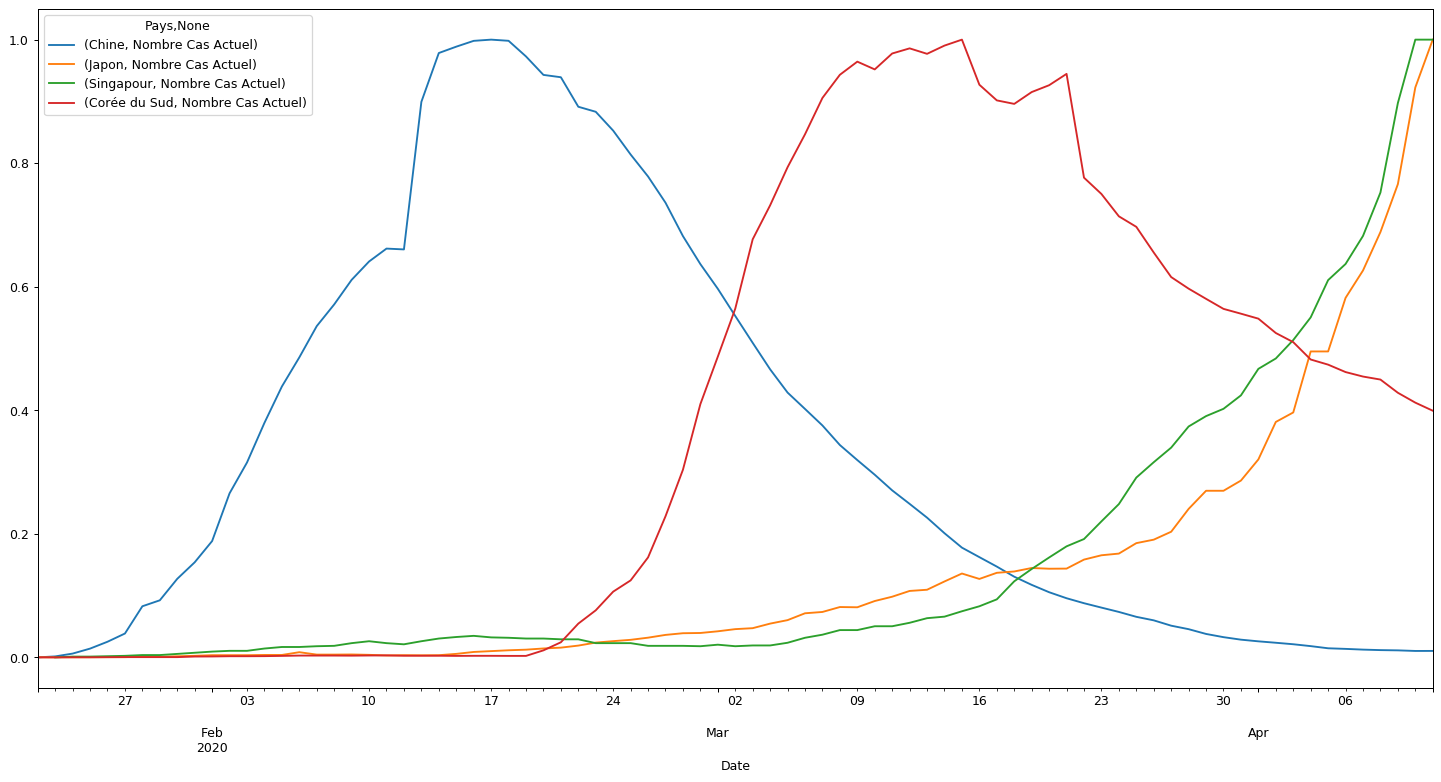

In [27]:
#.loc['2020-01-01':'2020-02-29']
covid_daily_asie_evolution=covid_daily_asie[[('Chine','Nombre Cas Actuel'),('Japon','Nombre Cas Actuel'),('Singapour','Nombre Cas Actuel'),('Corée du Sud','Nombre Cas Actuel')]]
scaled = pd.DataFrame(columns=covid_daily_asie_evolution.columns, index=covid_daily_asie_evolution.index)
scaled[covid_daily_asie_evolution.columns] = MinMaxScaler().fit_transform(covid_daily_asie_evolution)
scaled.plot()

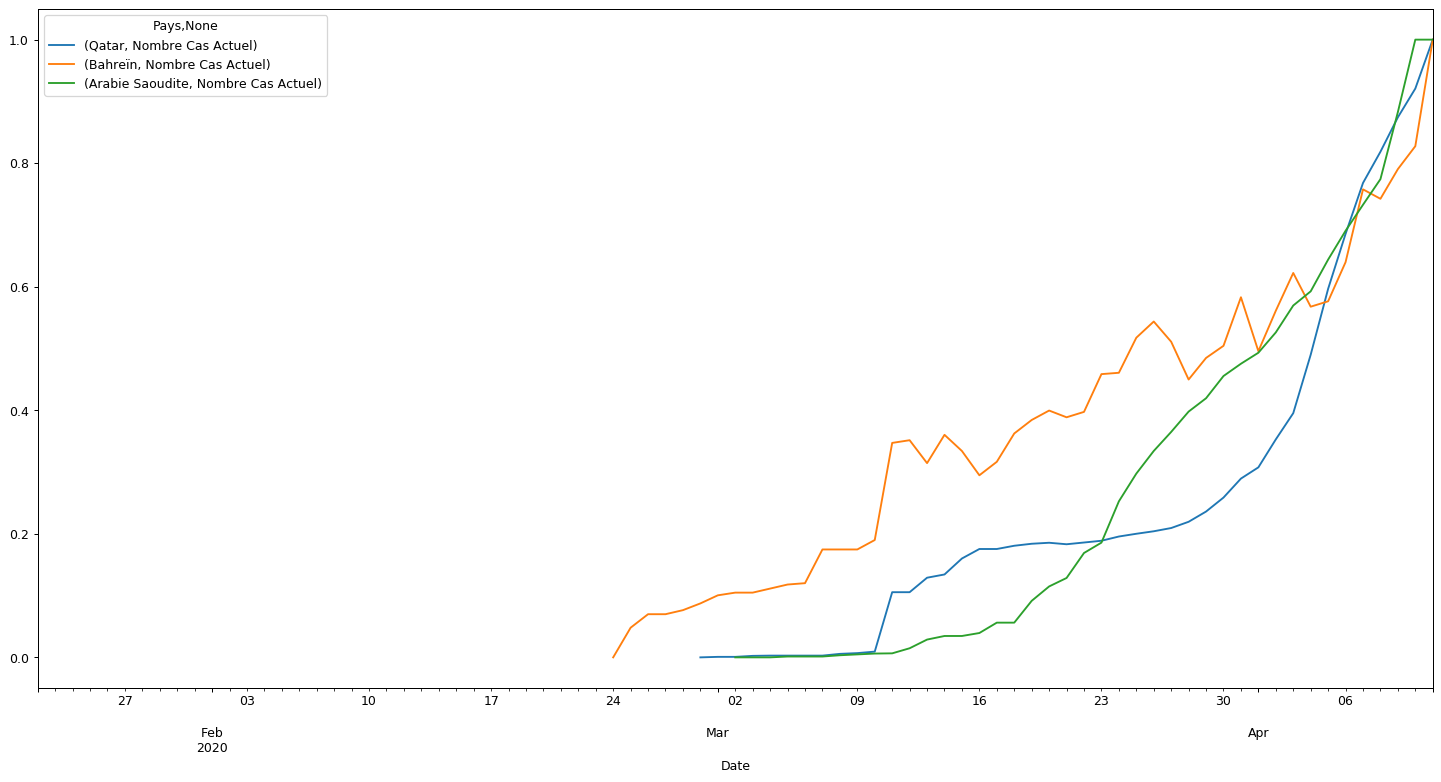

In [32]:
covid_daily_middle_east_evolution=covid_daily_middle_east[[('Qatar','Nombre Cas Actuel'),('Bahreïn','Nombre Cas Actuel'),('Arabie Saoudite','Nombre Cas Actuel')]]
scaled = pd.DataFrame(columns=covid_daily_middle_east_evolution.columns, index=covid_daily_asie_evolution.index)
scaled[covid_daily_middle_east_evolution.columns] = MinMaxScaler().fit_transform(covid_daily_middle_east_evolution)
 
scaled.plot()

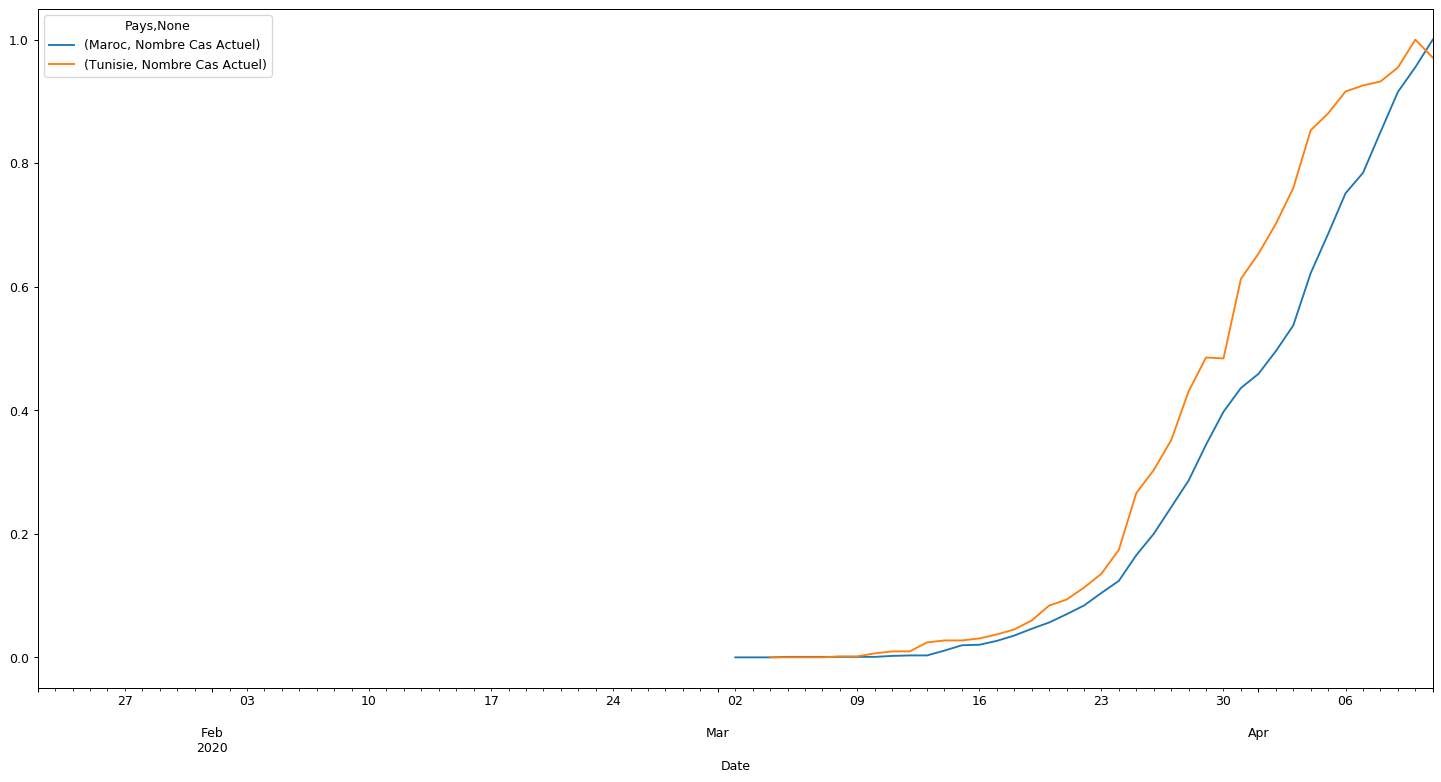

In [31]:
#.loc['2020-01-01':'2020-02-29']
covid_daily_afrique_evolution=covid_daily_afrique[[('Maroc','Nombre Cas Actuel'),('Tunisie','Nombre Cas Actuel')]]
scaled = pd.DataFrame(columns=covid_daily_afrique_evolution.columns, index=covid_daily_afrique_evolution.index)
scaled[covid_daily_afrique_evolution.columns] = MinMaxScaler().fit_transform(covid_daily_afrique_evolution)
scaled.plot()
